In [32]:
# week 1 
import numpy as np #data handling 
import pandas as pd # data handling
import matplotlib.pyplot as plt #visuvailaztion
import seaborn as sns# visulaisation
import os#file management
from pathlib import Path#file managment
from PIL import Image# pillow library  to open a image file 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img# image processing 
from sklearn.model_selection import train_test_split#for data spliting 
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D#model building
from tensorflow.keras.models import Model, load_model#which model building

In [5]:
path = Path("Datasets/")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))#above directry  i  would like to display a list of image files  and  exact only file names 

In [6]:
print(len(filenames)) # print total number of images 
print(filenames[:3])#slect 1st 3 files  

23708
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


# Data preprocessing

Data I have downloaded is composed of 23,708 images with age and gender in the Image Name. For Example, 1_0_0_239389.JPG image means that age is 1, gender is 0 (male) and 0 refers to the race (not needed in this task).
So I split the image name on ' _ ' so I can get separated age and gender with image.
Also, I have shuffle all the images

In [ ]:
np.random.seed(10) # inorder to make sure  that everytime we run the code suffle order of file names will be the same 
np.random.shuffle(filenames)#randomly rearranges the file 

age_labels, gender_labels, image_path = [], [], []#  to exact 

for filename in filenames:
    image_path.append(filename)# Store the image file name
    temp = filename.split('_')# Split filename by
    age_labels.append(temp[0])## First part age
    gender_labels.append(temp[1]) # Second part gender

In [8]:
#image_path

# From Unstructured data to Structured data

In [ ]:
#week 2
df = pd.DataFrame()#Creating an Empty DataFrame
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels#Adding (attribute)Data to the DataFrame

In [10]:
df.head()

,image,age,gender
0,23_1_2_20170116172910708.jpg.chip.jpg,23,1
1,28_0_1_20170113150719161.jpg.chip.jpg,28,0
2,26_1_0_20170116234741431.jpg.chip.jpg,26,1
3,37_0_3_20170119202516470.jpg.chip.jpg,37,0
4,60_0_0_20170109013457906.jpg.chip.jpg,60,0


In [11]:
gender_dict = {0:"Male",1:"Female"}

In [12]:
df = df.astype({'age':'float32', 'gender': 'int32'})

In [13]:
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object


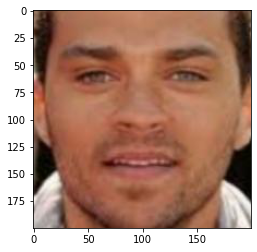

In [ ]:
img = Image.open("Datasets/"+df.image[1])# retrive 
plt.imshow(img)# to show image in graphical way

In [15]:
#sns.distplot(df.age)

# Plotting Images

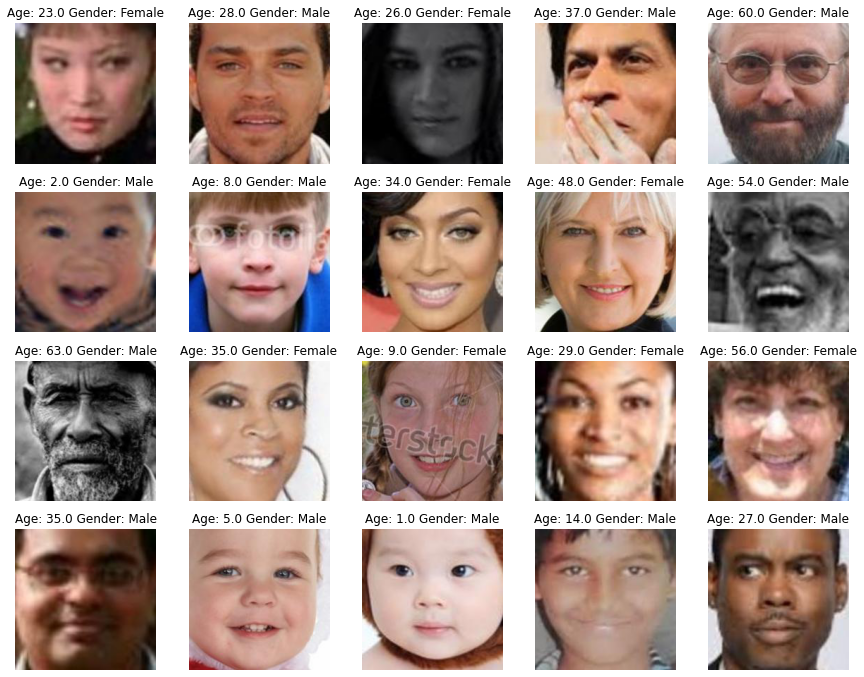

In [ ]:
# week 3
files = df.iloc[0:20]# to select 1st 20 images  and save in file to read 
plt.figure(figsize=(15,15))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("datasets/"+file)# open imgae file
    img = np.array(img)# image clear use np
    plt.imshow(img)#display
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off') # off side graph

Since dataset is too large, It is taking a lot of time to train the model so I am splitting the data and only using half of the dataset. 
I have already shuffled all the data to ensure no biasness in the dataset.

In [17]:
train, test = train_test_split(df, test_size=0.20, random_state=42)#test 20% and train 80% , chaging the anther number also it will give a same 

In [18]:
train.head()

,image,age,gender
5096,14_0_0_20170110220704398.jpg.chip.jpg,14.0,0
19586,71_0_0_20170111222535839.jpg.chip.jpg,71.0,0
9835,31_1_1_20170116224134208.jpg.chip.jpg,31.0,1
13631,32_0_0_20170105172708084.jpg.chip.jpg,32.0,0
9807,42_0_0_20170113182201676.jpg.chip.jpg,42.0,0


# Extracting Features

In [ ]:
#week 4 and 5 converting Image to numpy array (extracting feature)
x_train = []# empty list  and that store 
for file in train.image:
    print(file)
    img = load_img("Datasets/"+file, color_mode='grayscale')
    print(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)#Convert the Image to a NumPy Array
    x_train.append(img)# added the imgae into x train 

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)# lenth , grayscale and reshape 

14_0_0_20170110220704398.jpg.chip.jpg
<PIL.Image.Image image mode=L size=200x200 at 0x1DB2E4C0AC0>
71_0_0_20170111222535839.jpg.chip.jpg
<PIL.Image.Image image mode=L size=200x200 at 0x1DB270F01C0>
31_1_1_20170116224134208.jpg.chip.jpg
<PIL.Image.Image image mode=L size=200x200 at 0x1DB2E4C0AC0>
32_0_0_20170105172708084.jpg.chip.jpg
<PIL.Image.Image image mode=L size=200x200 at 0x1DB2E4C0F70>
42_0_0_20170113182201676.jpg.chip.jpg
<PIL.Image.Image image mode=L size=200x200 at 0x1DB2AAFF340>
59_0_0_20170111203716454.jpg.chip.jpg
<PIL.Image.Image image mode=L size=200x200 at 0x1DB2E4C0F70>
42_1_1_20170113005712902.jpg.chip.jpg
<PIL.Image.Image image mode=L size=200x200 at 0x1DB2E4C0AC0>
26_0_4_20170117200038821.jpg.chip.jpg
<PIL.Image.Image image mode=L size=200x200 at 0x1DB2A4910D0>
1_0_3_20161219225958712.jpg.chip.jpg
<PIL.Image.Image image mode=L size=200x200 at 0x1DB2E4C0AC0>
38_0_1_20170117142745510.jpg.chip.jpg
<PIL.Image.Image image mode=L size=200x200 at 0x1DB2E4C0F70>
35_1_2_2017

In [20]:
x_train.shape 

(18966, 128, 128, 1)

# Normalizing data

In [21]:
x_train = x_train/255 

In [ ]:
y_gender = np.array(train.gender)# pands to coverting  numpy arrays 
y_age = np.array(train.age)

In [23]:
input_size = (128,128,1)

# Creating model

In [ ]:
#week 6
inputs = Input((input_size))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])

In [25]:
model.compile(loss=['categorical_crossentropy','mae'], optimizer='adam', metrics=[['accuracy'],['mae']])

In [26]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 126, 126,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 42, 42,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 40, 40,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 20, 20,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 18, 18,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 9, 9, 256) │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 20736)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │  5,308,672 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  5,308,672 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     32,896 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_output       │ (None, 1)         │        257 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_output (Dense)  │ (None, 1)         │        129 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,020,546 (42.04 MB)

 Trainable params: 11,020,418 (42.04 MB)

 Non-trainable params: 128 (512.00 B)

# Training the model

In [27]:
#week 7
model_history = model.fit(x=x_train, y=[y_gender, y_age], batch_size = 128, epochs=20, validation_split= 0.1)

Epoch 1/20


c:\Users\poojitha\anaconda3\lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


134/134 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - age_output_loss: 33.1874 - age_output_mae: 33.1876 - gender_output_accuracy: 0.5236 - gender_output_loss: 0.0000e+00 - loss: 33.1876 - val_age_output_loss: 33.2810 - val_age_output_mae: 33.2683 - val_gender_output_accuracy: 0.5219 - val_gender_output_loss: 0.0000e+00 - val_loss: 33.2683
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - age_output_loss: 33.2463 - age_output_mae: 33.2461 - gender_output_accuracy: 0.5249 - gender_output_loss: 0.0000e+00 - loss: 33.2461 - val_age_output_loss: 33.2810 - val_age_output_mae: 33.2683 - val_gender_output_accuracy: 0.5219 - val_gender_output_loss: 0.0000e+00 - val_loss: 33.2683
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - age_output_loss: 33.3265 - age_output_mae: 33.3263 - gender_output_accuracy: 0.5239 - gender_output_loss: 0.0000e+00 - loss: 33.3263 - val_age_output_loss: 33.2810 - val_age_output_mae: 33.2683 - val_gender_output_accuracy: 0.5219 - val_gender_output_loss: 0.0000e+00 - 

# Visualizing loss

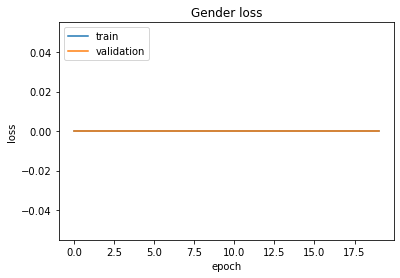

In [28]:
plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

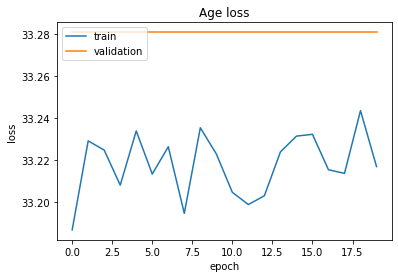

In [29]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Predicting test image

Original: Gender =  Male  Age =  71.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Prediction: Gender =  Male  Age =  0


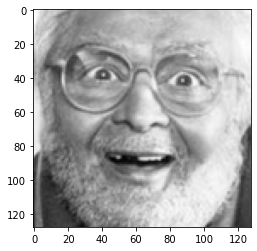

In [30]:
#week 8
index=1
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

Original: Gender =  Male  Age =  48.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Gender =  Male  Age =  0


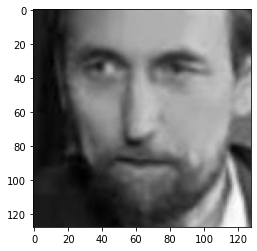

In [31]:
index=20
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')